Задание
Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.
Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, 
а именно проведения разведочного анализа данных. 
В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. 
Целевая переменная – MedHouseVal. 
Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

   :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None
            
            The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from math import sqrt
import seaborn as sns


In [152]:
df = sklearn.datasets.fetch_california_housing(as_frame=True).frame
res = {}
res['Метрики'] = ('R2 train', 'RMSE train', 'R2 test', 'RMSE test')

In [153]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Проверьте данные на наличие пропусков. Удалите их в случае обнаружени

In [154]:
df.isna().mean()*100

MedInc         0.0
HouseAge       0.0
AveRooms       0.0
AveBedrms      0.0
Population     0.0
AveOccup       0.0
Latitude       0.0
Longitude      0.0
MedHouseVal    0.0
dtype: float64

Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [155]:
X = df.drop('MedHouseVal', axis= 1)
y = pd.Series(df['MedHouseVal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [156]:
def get_metrics(X_train, X_test, y_train, y_test):
        model = LinearRegression()
  
        scaler = StandardScaler()
        X_train_ = scaler.fit_transform(X_train)
        X_test_ = scaler.transform(X_test)
        
        model.fit(X_train_, y_train)
        
        y_pred = model.predict(X_train_)
        train_r2 = r2_score(y_train, y_pred)
        train_rmse = sqrt(mean_squared_error(y_train, y_pred))
               
        y_pred = model.predict(X_test_)
        test_r2 = r2_score(y_test, y_pred)
        test_rmse = sqrt(mean_squared_error(y_test, y_pred))

        return train_r2, train_rmse, test_r2, test_rmse
   


In [157]:
# на тестовой выборке показатели хуже

res['Исходный датасет'] = get_metrics(X_train, X_test, y_train, y_test)


Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

<Axes: >

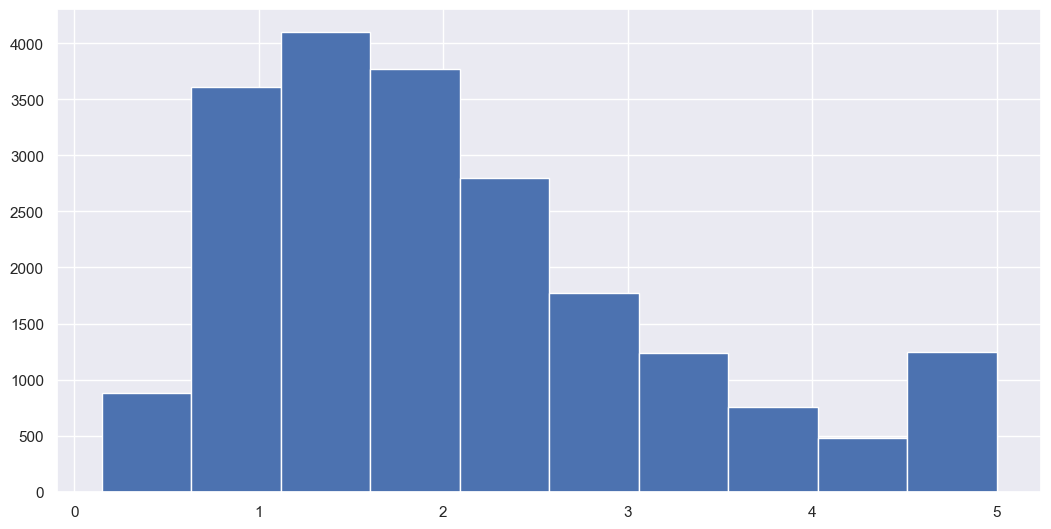

In [158]:
# да выбросы есть
df['MedHouseVal'].hist()

Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.
c. Повторите п. 3, п. 4 на измененных данных.

<Axes: >

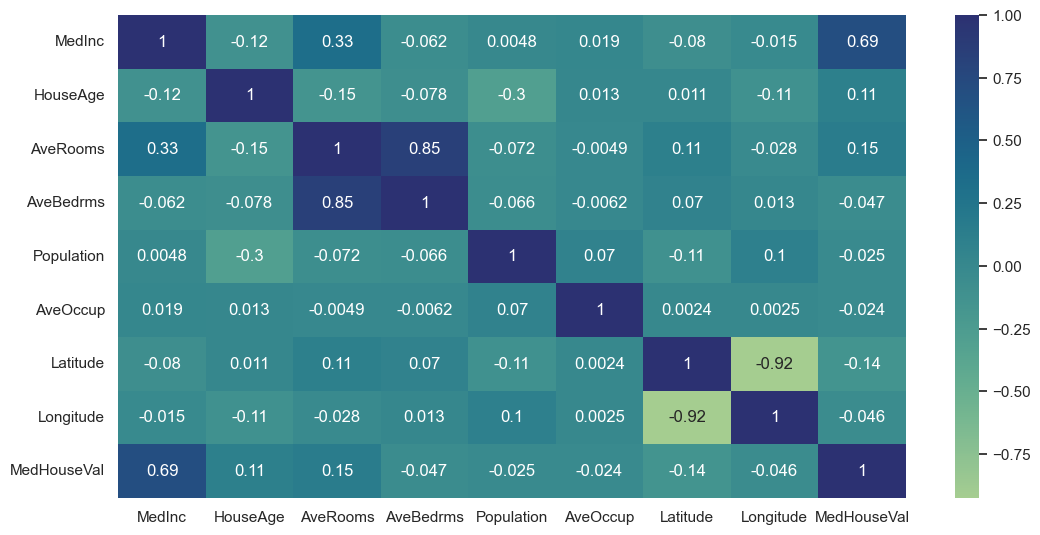

In [159]:
# корреляция между AveBedrms и AveRooms
sns.set(rc={'figure.figsize':(12.7, 6.27)})
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=True, cmap='crest')

In [160]:
#Удаляем AveRooms т.к. у него есть еще заметная клрреляция с MedInc, - после удаления метрики немного улучшились
df.drop(columns = ['AveRooms'], inplace = True)

X = df.drop('MedHouseVal', axis= 1)
y = pd.Series(df['MedHouseVal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

res['Удалили избыточность'] = get_metrics(X_train, X_test, y_train, y_test)
res

{'Метрики': ('R2 train', 'RMSE train', 'R2 test', 'RMSE test'),
 'Исходный датасет': (0.6125511913966952,
  0.7196757085831575,
  0.575787706032451,
  0.7455813830127763),
 'Удалили избыточность': (0.6043614091244852,
  0.7272420835082768,
  0.5799358837198175,
  0.7419270782296468)}

Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.

In [161]:
# межквартальный диапазон
q1 = df['MedHouseVal'].quantile(0.25)
q3 = df['MedHouseVal'].quantile(0.75)
iqr = df['MedHouseVal'].quantile(0.75) - df['MedHouseVal'].quantile(0.25)
lower_bound = df['MedHouseVal'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['MedHouseVal'].quantile(0.75) + (1.5 * iqr)
remove_outliers = df.query(f'`MedHouseVal` < {lower_bound} or `MedHouseVal` > {upper_bound}')
remove_outliers.count()


MedInc         1071
HouseAge       1071
AveBedrms      1071
Population     1071
AveOccup       1071
Latitude       1071
Longitude      1071
MedHouseVal    1071
dtype: int64

In [162]:
# выбросы 5% - удаляем, - метрики улушились

df_ = df.loc[((upper_bound >= df['MedHouseVal']) & (df['MedHouseVal'] >= lower_bound))]

X = df_.drop('MedHouseVal', axis= 1)
y = pd.Series(df_['MedHouseVal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

res['Удалили выбросы'] = get_metrics(X_train, X_test, y_train, y_test)
res

{'Метрики': ('R2 train', 'RMSE train', 'R2 test', 'RMSE test'),
 'Исходный датасет': (0.6125511913966952,
  0.7196757085831575,
  0.575787706032451,
  0.7455813830127763),
 'Удалили избыточность': (0.6043614091244852,
  0.7272420835082768,
  0.5799358837198175,
  0.7419270782296468),
 'Удалили выбросы': (0.5596038974653276,
  0.6321147859107865,
  0.5887055576275044,
  0.616744218048715)}

Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

In [163]:


df__ = df_.copy()

df__['HouseAge'] = np.power(df__['HouseAge'],2)
df__['AveBedrms'] = np.log(df__['AveBedrms'])
df__['Population'] = np.sqrt(df__['Population'])

In [164]:
X = df__.drop('MedHouseVal', axis= 1)
y = pd.Series(df__['MedHouseVal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

res['Мат. преобразование'] = get_metrics(X_train, X_test, y_train, y_test)
res

{'Метрики': ('R2 train', 'RMSE train', 'R2 test', 'RMSE test'),
 'Исходный датасет': (0.6125511913966952,
  0.7196757085831575,
  0.575787706032451,
  0.7455813830127763),
 'Удалили избыточность': (0.6043614091244852,
  0.7272420835082768,
  0.5799358837198175,
  0.7419270782296468),
 'Удалили выбросы': (0.5596038974653276,
  0.6321147859107865,
  0.5887055576275044,
  0.616744218048715),
 'Мат. преобразование': (0.5657072416178515,
  0.6277193401775412,
  0.5954162494370212,
  0.6116921176502571)}

In [165]:

res_ = pd.DataFrame(res)
res_

,Метрики,Исходный датасет,Удалили избыточность,Удалили выбросы,Мат. преобразование
0,R2 train,0.612551,0.604361,0.559604,0.565707
1,RMSE train,0.719676,0.727242,0.632115,0.627719
2,R2 test,0.575788,0.579936,0.588706,0.595416
3,RMSE test,0.745581,0.741927,0.616744,0.611692


В ходе работы были построенны модели  линейной регрессии 
для исходных данных, 
после удаление избыточных признаков, 
после удаления выбросов,
после математического изменения признаков.

метрики на тестовой выборке улучшались при каждом тесте
Вывод - с исходными данными можно и нужно работать
